# Air Quality Project
# Part A-2

# Anomaly Detection with KMeans

In [0]:
# some function for later

# return Series of distance between each point and his distance with the closest centroid
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

# train markov model to get transition matrix
def getTransitionMatrix (df):
	df = np.array(df)
	model = msm.estimate_markov_model(df, 1)
	return model.transition_matrix

def markovAnomaly(df, windows_size, threshold):
    transition_matrix = getTransitionMatrix(df)
    real_threshold = threshold**windows_size
    df_anomaly = []
    for j in range(0, len(df)):
        if (j < windows_size):
            df_anomaly.append(0)
        else:
            sequence = df[j-windows_size:j]
            sequence = sequence.reset_index(drop=True)
            df_anomaly.append(anomalyElement(sequence, real_threshold, transition_matrix))
    return df_anomaly

In [0]:
df = df[['NO2 AQI', 'O3 AQI','SO2 AQI','CO AQI']] 

In [0]:
df['cluster'] = kmeans[5].predict(data)
df['cluster'].value_counts()

0    15529
3    13211
4     9546
1     7239
5     2370
2     2105
Name: cluster, dtype: int64

In [0]:
df['principal_feature1'] = data[0]
df['principal_feature2'] = data[1]

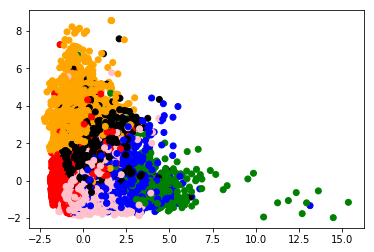

In [0]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))
plt.show()

In [0]:
# An estimation of anomly population of the dataset (necessary for several algorithm)
outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[5])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly21 contain the anomaly result of method 2.1 Cluster (0:normal, 1:anomaly) 
df['anomaly21'] = (distance >= threshold).astype(int)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [0]:
threshold

89.32446715873013

In [0]:
number_of_outliers

500

In [0]:
df = df.dropna()

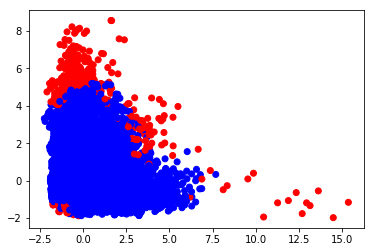

In [0]:
# visualisation of anomaly with cluster view
fig, ax = plt.subplots()
colors = {0:'blue', 1:'red'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly21"].apply(lambda x: colors[x]))
plt.show()

In [0]:
anomaly =  df['anomaly21']==1
print(anomaly.head())

1    False
2    False
3    False
4    False
5    False
Name: anomaly21, dtype: bool


In [0]:
df_anomaly = df[anomaly]

In [0]:
print(df_anomaly)

       NO2 AQI  O3 AQI     SO2 AQI    CO AQI  cluster  principal_feature1  \
848       48.0    77.0    8.879979   6.00000        5            0.102552   
849       60.0   132.0   13.000000  11.57636        5           -0.209317   
850       60.0   132.0   13.000000   7.00000        5           -0.030466   
851       60.0   132.0    8.879979  11.57636        5           -0.342335   
1448     130.0    32.0    8.879979  35.00000        2            1.713938   
1449     118.0    77.0    4.000000  11.57636        2            3.310206   
1450     118.0    77.0    4.000000  35.00000        2            1.871492   
1451     118.0    77.0    8.879979  11.57636        2            3.467760   
1452     118.0    77.0    8.879979  35.00000        2            2.009941   
1453     124.0    71.0    7.000000  11.57636        2            3.538061   
1454     124.0    71.0    7.000000  34.00000        2            2.070638   
1455     124.0    71.0    8.879979  11.57636        2            3.598758   

In [0]:
df_anomaly = df_anomaly.dropna()

In [0]:
dfa = df_anomaly[['NO2 AQI', 'O3 AQI','SO2 AQI','CO AQI']] 

In [0]:
df

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,cluster,principal_feature1,principal_feature2,anomaly21
1,46.0,34.0,13.000000,11.57636,4,1.415689,0.155792,0.0
2,46.0,34.0,13.000000,25.00000,1,0.367881,0.190257,0.0
3,46.0,34.0,8.879979,11.57636,4,1.282671,0.031321,0.0
4,46.0,34.0,8.879979,25.00000,4,-0.041559,-0.419684,0.0
5,34.0,27.0,4.000000,11.57636,3,0.941379,-0.590460,0.0
6,34.0,27.0,4.000000,26.00000,3,0.115994,-0.272254,0.0
7,34.0,27.0,8.879979,11.57636,3,1.098933,-0.443030,0.0
8,34.0,27.0,8.879979,26.00000,3,0.802837,-0.513536,0.0
9,48.0,14.0,16.000000,11.57636,1,1.922071,-0.707992,0.0
10,48.0,14.0,16.000000,28.00000,1,0.572962,-0.728640,0.0


In [0]:
common = df.merge(df_anomaly,on=['NO2 AQI','O3 AQI','SO2 AQI', 'CO AQI'])
print(common)

     NO2 AQI  O3 AQI     SO2 AQI    CO AQI  cluster_x  principal_feature1_x  \
0       48.0    77.0    8.879979   6.00000          5              0.102552   
1       48.0    77.0    8.879979   6.00000          5              0.326441   
2       60.0   132.0   13.000000  11.57636          5             -0.209317   
3       60.0   132.0   13.000000   7.00000          5             -0.030466   
4       60.0   132.0    8.879979  11.57636          5             -0.342335   
5      130.0    32.0    8.879979  35.00000          2              1.713938   
6      118.0    77.0    4.000000  11.57636          2              3.310206   
7      118.0    77.0    4.000000  35.00000          2              1.871492   
8      118.0    77.0    8.879979  11.57636          2              3.467760   
9      118.0    77.0    8.879979  35.00000          2              2.009941   
10     124.0    71.0    7.000000  11.57636          2              3.538061   
11     124.0    71.0    7.000000  34.00000          

In [0]:
new_df = df[(df['NO2 AQI'].isin(common['NO2 AQI']))&(df['O3 AQI'].isin(common['O3 AQI']))&(df['SO2 AQI'].isin(common['SO2 AQI']))&(df['CO AQI'].isin(common['CO AQI']))]

In [0]:
new_df 

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,cluster,principal_feature1,principal_feature2,anomaly21
1,46.0,34.0,13.000000,11.57636,4,1.415689,0.155792,0.0
3,46.0,34.0,8.879979,11.57636,4,1.282671,0.031321,0.0
5,34.0,27.0,4.000000,11.57636,3,0.941379,-0.590460,0.0
7,34.0,27.0,8.879979,11.57636,3,1.098933,-0.443030,0.0
9,48.0,14.0,16.000000,11.57636,1,1.922071,-0.707992,0.0
10,48.0,14.0,16.000000,28.00000,1,0.572962,-0.728640,0.0
11,48.0,14.0,8.879979,11.57636,1,1.692196,-0.923096,0.0
12,48.0,14.0,8.879979,28.00000,1,1.532609,0.622965,0.0
13,72.0,28.0,23.000000,11.57636,2,3.060730,0.357468,0.0
14,72.0,28.0,23.000000,34.00000,2,1.076734,0.196382,0.0


In [0]:
file_name = "clustered_data.csv"
new_df.to_csv(file_name, sep=',')